In [1]:
import pandas as pd 
import numpy as np 
import nltk
import seaborn as sns 
import matplotlib.pyplot as plt
from Column import *

### 📍 Reading Dataset

In [2]:
df = pd.read_csv("Dataset/amazon.csv")
df

,Text,label
0,This is the best apps acording to a bunch of ...,1
1,This is a pretty good version of the game for ...,1
2,this is a really . there are a bunch of levels...,1
3,"This is a silly game and can be frustrating, b...",1
4,This is a terrific game on any pad. Hrs of fun...,1
...,...,...
19991,this app is fricken stupid.it froze on the kin...,0
19992,Please add me!!!!! I need neighbors! Ginger101...,1
19993,love it! this game. is awesome. wish it had m...,1
19994,I love love love this app on my side of fashio...,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19996 entries, 0 to 19995
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    19996 non-null  object
 1   label   19996 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 312.6+ KB


In [4]:
df.describe(include="object")

,Text
count,19996
unique,19996
top,This game is a rip off. Here is a list of thin...
freq,1


In [6]:
df.isnull().sum()

Text     0
label    0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [20]:
df["label"].value_counts()

label
1    15230
0     4766
Name: count, dtype: int64

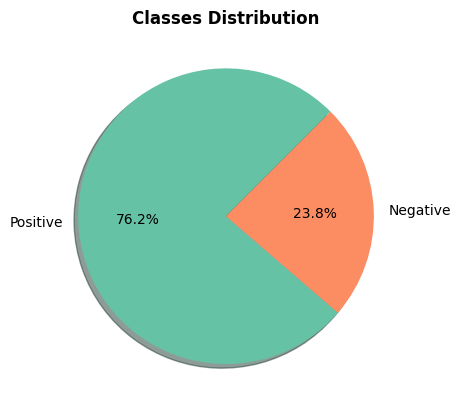

In [49]:
counts = df["label"].value_counts().to_numpy()

colors = sns.color_palette('Set2', len(df))
plt.title("Classes Distribution",weight="bold")
plt.pie(x=counts,labels=["Positive","Negative"],colors=colors,rotatelabels=False,autopct="%1.1f%%",startangle=45,shadow=True)
plt.show()

### 🛠 Text Preprocessing 

> - **Column Class:** is used for update **`CleanedText Column`** without repeating Block of Code

In [13]:
df["CleanedText"] = df["Text"].apply(lambda e: e.lower())

In [14]:
text = column(Dataset=df,Column_name="CleanedText")

In [15]:
text.Update(func=lambda e: e.lower())
df

,Text,label,CleanedText
0,this is the best apps acording to a bunch of ...,1,this is the best apps acording to a bunch of ...
1,this is a pretty good version of the game for ...,1,this is a pretty good version of the game for ...
2,this is a really . there are a bunch of levels...,1,this is a really . there are a bunch of levels...
3,"this is a silly game and can be frustrating, b...",1,"this is a silly game and can be frustrating, b..."
4,this is a terrific game on any pad. hrs of fun...,1,this is a terrific game on any pad. hrs of fun...
...,...,...,...
19991,this app is fricken stupid.it froze on the kin...,0,this app is fricken stupid.it froze on the kin...
19992,please add me!!!!! i need neighbors! ginger101...,1,please add me!!!!! i need neighbors! ginger101...
19993,love it! this game. is awesome. wish it had m...,1,love it! this game. is awesome. wish it had m...
19994,i love love love this app on my side of fashio...,1,i love love love this app on my side of fashio...
